### 이미지 분석

In [1]:
#다운받기
#from urllib.request import urlretrieve
#urlretrieve('http://doc.mindscale.kr/km/unstructured/dog-vs-cat.zip',
#            'dog-vs-cat.zip')

('dog-vs-cat.zip', <http.client.HTTPMessage at 0x7caaad7160>)

In [2]:
#압축풀기
#from zipfile import ZipFile

#with ZipFile('dog-vs-cat.zip') as z:
#    z.extractall()

### # 이미지 파일 찾기

In [1]:
from PIL import Image
import os

In [6]:
images = os.listdir('data/dog-vs-cat/train/dog')

In [7]:
image = Image.open('data/dog-vs-cat/train/dog/dog.77.jpg')

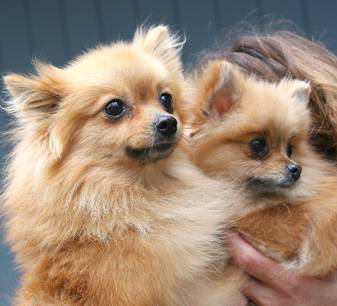

In [8]:
image

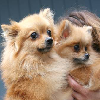

In [9]:
image.resize((100,100))

#### # convert

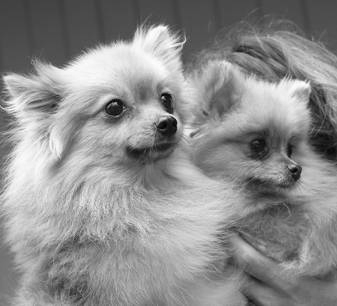

In [10]:
image.convert('L')

L : 흑백

RGB : Red, Green, Blue 삼원색을 이용한 색 표현

RGBA : Red, Green, Blue 삼원색을 이용한 색 표현 방법 + 투명도

CMYK : Cyan, Magenta, Yellow, Black 을 이용한 색 표현 방법

In [11]:
import numpy as np

In [12]:
np.array(image)

array([[[ 52,  70,  82],
        [ 52,  70,  82],
        [ 52,  70,  82],
        ..., 
        [ 57,  78,  97],
        [ 57,  78,  97],
        [ 59,  80,  99]],

       [[ 52,  70,  82],
        [ 52,  70,  82],
        [ 52,  70,  82],
        ..., 
        [ 57,  78,  97],
        [ 57,  78,  97],
        [ 59,  80,  99]],

       [[ 52,  70,  82],
        [ 52,  70,  82],
        [ 52,  70,  82],
        ..., 
        [ 58,  79,  98],
        [ 58,  79,  98],
        [ 59,  80,  99]],

       ..., 
       [[102, 134, 149],
        [104, 136, 151],
        [104, 136, 151],
        ..., 
        [137, 103,  91],
        [137, 103,  91],
        [138, 105,  90]],

       [[102, 129, 140],
        [107, 131, 143],
        [113, 132, 147],
        ..., 
        [135,  99,  83],
        [140, 104,  88],
        [142, 109,  92]],

       [[ 99, 126, 137],
        [104, 128, 140],
        [111, 130, 145],
        ..., 
        [135,  99,  83],
        [141, 105,  89],
        [142, 109,

In [13]:
image.size

(337, 306)

In [14]:
np.asarray(image).shape # R G B 세장이 있다고 보면됨

(306, 337, 3)

### # keras 이미지 기계학습

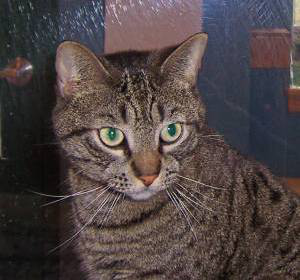

In [16]:
from keras.preprocessing.image import load_img
load_img('data/dog-vs-cat/train/cat/cat.1.jpg')

In [18]:
from keras.preprocessing.image import ImageDataGenerator
train = ImageDataGenerator().flow_from_directory(
    'data/dog-vs-cat/train',     # 이미지 디렉토리
    target_size=(100, 100), # 변환할 크기는 가로 100, 세로 100
    color_mode='rgb',       # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
    class_mode='binary')    # 고양이 vs. 개로 binary 분류

Found 2000 images belonging to 2 classes.


In [19]:
valid = ImageDataGenerator().flow_from_directory(
    'data/dog-vs-cat/validation',
    target_size=(100, 100),
    class_mode='binary')

Found 800 images belonging to 2 classes.


#### 모형 만들기

In [29]:
from keras import Sequential
from keras.layers import Dense, Flatten

In [30]:
model = Sequential()

In [31]:
model.add(Flatten(input_shape=(100, 100, 3)))

In [32]:
model.add(Dense(1, activation='sigmoid')) #y값이 1개짜리니까 1이다.

In [33]:
model.summary() #param은 가중치의 갯수다

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 30001     
Total params: 30,001
Trainable params: 30,001
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [26]:
#mse: 오차 제곱의 평균. 연속적인 예측을 할 때 사용한다. 이 때는 metrics를 쓰지 않는다.
    
#binary_crossentropy: 둘 중에 하나로 분류할 때 사용한다.
    
#categorical_crossentropy: 셋 이상으로 분류할 때 사용한다.

In [35]:
model.fit_generator(train, validation_data=valid, epochs=5)

Epoch 1/5
63/63 [==============================] - 9s 144ms/step - loss: 8.0748 - acc: 0.4990 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
63/63 [==============================] - 7s 117ms/step - loss: 8.0512 - acc: 0.5005 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
63/63 [==============================] - 7s 110ms/step - loss: 8.0669 - acc: 0.4995 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
63/63 [==============================] - 7s 116ms/step - loss: 8.0669 - acc: 0.4995 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
63/63 [==============================] - 7s 113ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000


##### 성능이 안나온다. 파람이 적어서 그렇다.